Salary Discrimination
The file salary.txt contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

Sex. 1 for female, 0 for male.
Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
Year. Number of years in current rank.
Degree. Highest degree. 1 for doctorate, 0 for master's.
YSdeg. Years since highest degree was earned.
Salary. Salary/year in dollars.

# Tasks
Find the linear regression equation for this data using columns 1-5 to column 6.
Find the selection of columns with the best  R2  score.
Report whether sex is a factor in salary.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [3]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [4]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [5]:
df.corr()

,Sex,Rank,Year,Degree,YSdeg,Salary
Sex,1.000000,-0.230411,-0.379404,0.077112,-0.088288,-0.252782
Rank,-0.230411,1.000000,0.507980,-0.014564,0.695724,0.867488
Year,-0.379404,0.507980,1.000000,-0.143377,0.638776,0.700669
Degree,0.077112,-0.014564,-0.143377,1.000000,-0.482836,-0.069726
YSdeg,-0.088288,0.695724,0.638776,-0.482836,1.000000,0.674854
Salary,-0.252782,0.867488,0.700669,-0.069726,0.674854,1.000000


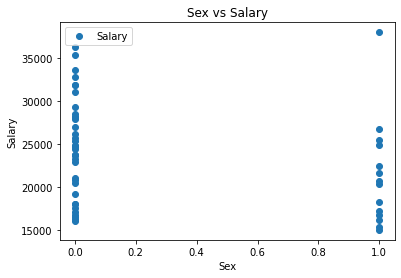

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [8]:
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Sex','Salary']].corr()

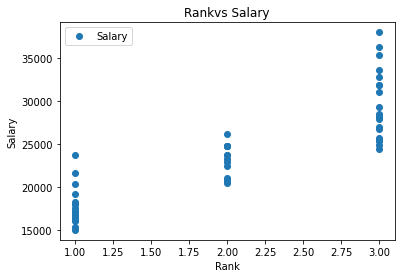

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [9]:
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rankvs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Rank','Salary']].corr()

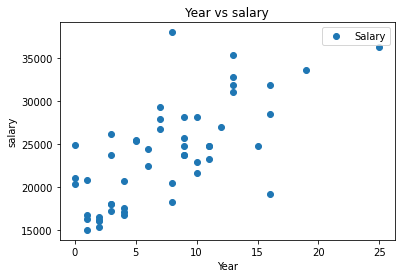

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [10]:
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs salary')
plt.xlabel('Year')
plt.ylabel('salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Year','Salary']].corr()

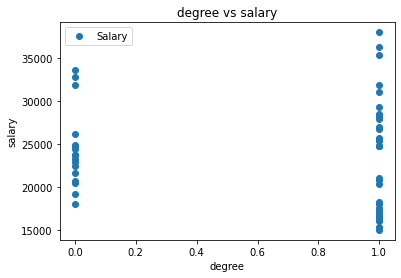

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [11]:
df.plot(x='Degree', y='Salary', style='o')
plt.title('degree vs salary')
plt.xlabel('degree')
plt.ylabel('salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['Degree','Salary']].corr()

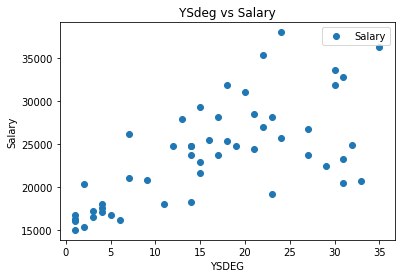

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [12]:
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSDEG')
plt.ylabel('Salary')
plt.show()
#dataset[['Average_income','Petrol_Consumption']].corr()
df[['YSdeg','Salary']].corr()

In [13]:
X = df[["Sex", "Rank", "Year","Degree","YSdeg"]].values # select all rows and select all columns except the last column as my feature
y = df.iloc[:, -1].values # target as arrays
# Syntax : dataset.loc[:, :-1]
from sklearn.model_selection import train_test_split #import the required function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 5)

In [14]:
from sklearn.linear_model import LinearRegression #importing all the required functions
regressor = LinearRegression() # spredicted score = m * hours + c  
"Symtax : varName = ModelName(modelHyperParams)"
regressor.fit(X_train, y_train) #Learning happens - GD is done and we get the final values of m and c

LinearRegression()

In [15]:
coeff_df = pd.DataFrame(regressor.coef_,["Sex", "Rank", "Year","Degree",'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Sex,1452.679842
Rank,5275.651443
Year,339.982118
Degree,-1011.886739
YSdeg,25.653297


In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
regressor.intercept_ 

10752.154606157228

In [18]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [19]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,22450,25539.975661
1,23725,22759.509899
2,16094,15721.536843
3,24450,29157.720884
4,23300,25838.513001
5,20525,24818.566649
6,24900,28852.694291
7,20690,24962.624615
8,28200,29557.069210
9,26775,30092.415889


In [20]:
from sklearn.model_selection import cross_validate
regressor = LinearRegression(normalize = True)


In [21]:
from sklearn import metrics
print(metrics.r2_score(y_test,y_pred))

0.7643758733362576
